In [ ]:
Никитина Наталья, РИМ-181226.

# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5,1,'Initial data')

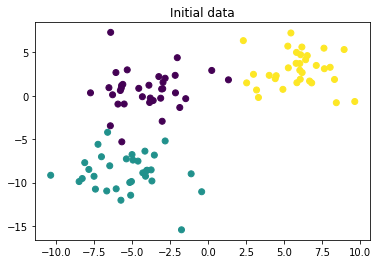

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
import numpy as np
import math
import random

In [5]:
def dist_eucl (p,q):
    return math.sqrt(sum([pow((p[i]-q[i]),2) for i in range(len(q))])) 
 
def funct_kNN(x_train, y_train, x_test, k):
    class_num = len(np.unique(y_train))
    y_test = []
    for el in x_test:
        dist = [[dist_eucl(el, x_train[i]),y_train[i]] for i in range(len(x_train))]
        class_stat = [0 for i in range(class_num)]
        for d in sorted(dist)[0:k]:
            class_stat[d[1]] += 1
        classes = sorted(zip(class_stat, range(class_num)),reverse=True)
        if classes[1][0]==classes[0][0]:
            equal_classes = []
            for i in range(1,3):
                if classes[i][0]==classes[0][0]:
                    equal_classes.append(classes[i][1])
            y_test.append(random.choice(equal_classes))
        else:
            y_test.append(classes[0][1])
    return np.array(y_test)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test_true = train_test_split(X, Y, test_size=0.25, random_state=42)

def get_accuracy(k):
    y_test_pred = funct_kNN(x_train,y_train,x_test,k)
    return accuracy_score(y_test_true, y_test_pred)

k_list = [1, 3, 5, 7, 9]

d = {'k': k_list, 'accuracy': [get_accuracy(k) for k in k_list]}
df = pd.DataFrame(data=d)
df

,k,accuracy
0,1,0.96
1,3,1.00
2,5,1.00
3,7,1.00
4,9,1.00


Постройте разделающие поверхности, которые строит классификатор

(-16.441854394619032, 6.47814560538048)

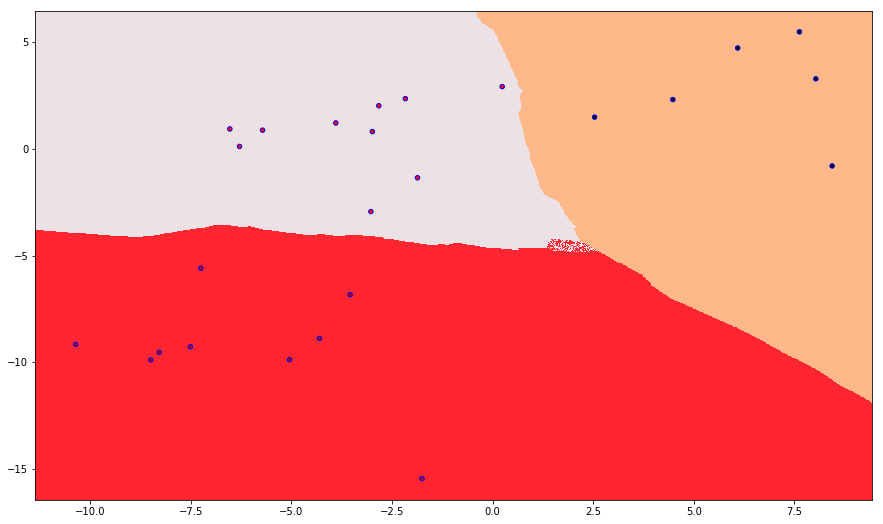

In [10]:
import matplotlib
from matplotlib.colors import ListedColormap

h = .02      
    
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))             

Z = funct_kNN(x_train,y_train,np.c_[xx.ravel(), yy.ravel()],9)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#ece2e6', '#ff2632', '#feb889'])

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test_true,edgecolor = 'b', cmap = 'flag', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [11]:
def funct_kNN_regression(x_train, y_train, x_test, k):
    y_test = []
    for el in x_test:
        dist = [[math.fabs(el-x_train[i]),y_train[i]] for i in range(len(x_train))] 
        k_dist_list = sorted(dist)[0:k]
        y_test.append(np.average([k_dist_list[i][1] for i in range(k)]))
    return y_test

In [12]:
fs = 5
f = 5
x = np.arange(fs*1000)/1000 
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

In [13]:
x_train = np.empty((0, 1))
y_train = np.empty((0, 1))

for i in np.random.randint(5000, size=10):
    x_train = np.append(x_train, [x[i]])
    y_train = np.append(y_train, [y[i]])    

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

Text(0.5,1,'График исходной функции, тренировочных объектов и предсказанной функции для каждого значения k')

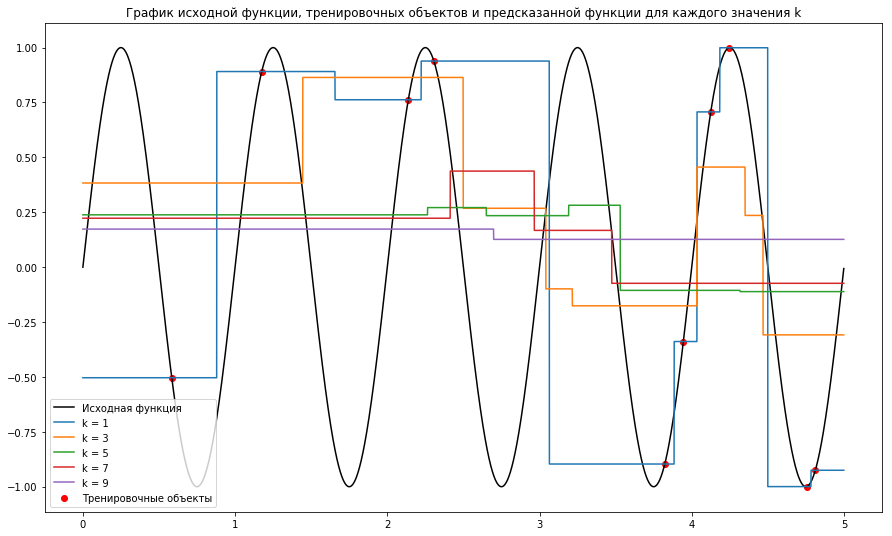

In [15]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.plot(x, y,label = 'Исходная функция', c = '0')
plt.scatter(x_train, y_train,label = 'Тренировочные объекты', c = 'r')

for k in [1,3,5,7,9]:
    plt.plot(x,funct_kNN_regression(x_train,y_train,x,k), label = 'k = %d' % k)
    
plt.legend()
plt.title('График исходной функции, тренировочных объектов и предсказанной функции для каждого значения k')

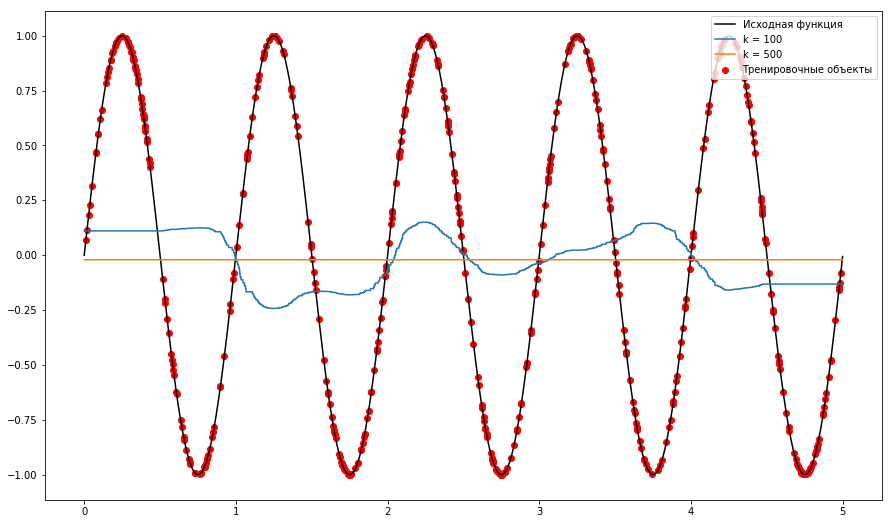

In [16]:
x_train = np.empty((0, 1))
y_train = np.empty((0, 1))

for i in np.random.randint(5000, size=500):
    x_train = np.append(x_train, [x[i]])
    y_train = np.append(y_train, [y[i]])    
    
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.plot(x, y,label = 'Исходная функция',  c = '0')
plt.scatter(x_train, y_train,label = 'Тренировочные объекты', c = 'r')

for k in [100, 500]:
    plt.plot(x,funct_kNN_regression(x_train,y_train,x,k), label='k = %d' % k)
    
plt.legend()